#### The Data Science Project 
1. Project Planning
2. Data Collection
3. Data Cleaning
4. EDA
5. Model Building (Skipped)
6. Production (Skipped)

#### Summary
This project is based on the job postings data set scraped from the website Glassdoor. Glassdoor is the worldwide leader on insights about jobs and companies (https://www.glassdoor.com/about-us/). In this project, we will use the cleaned data which stored in the csv file and Exploratory Data Analysis (EDA) to answer some questions about Data Scientist jobs in the U.S:
- What states have the most Data Scientist jobs?
- What states have the average minimal and maximal salaries in the U.S?
- What is the average salary among the states?
- What are the top 5 industries with the maximum number of data science-related jobs?
- What companies have the most jobs opening in Data Science?
- What job titles have the most number of jobs?
- What is the salary of the most number of Job Titles?
- What are the skills required for each title job?
- What is the relationship between the average wage and education?

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import ipywidgets as widgets
import plotly.io as pio
import plotly.express as px
import plotly.offline as py
import plotly.graph_objects as go

In [2]:
df = pd.read_csv('dataScienceJobs2021.csv')
df = df.drop('index', axis = 1)
df.head(3)

Job Title              Salary Estimate  \
0             Data Scientist   $53K-$91K (Glassdoor est.)   
1  Healthcare Data Scientist  $63K-$112K (Glassdoor est.)   
2             Data Scientist   $80K-$90K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Data Scientist\r\nLocation: Albuquerque, NM\r\...     3.8   
1  What You Will Do:\r\n\r\nI. General Summary\r\...     3.4   
2  KnowBe4, Inc. is a high growth information sec...     4.8   

                                   Company Name         Location  \
0                      Tecolote Research\r\n3.8  Albuquerque, NM   
1  University of Maryland Medical System\r\n3.4    Linthicum, MD   
2                                KnowBe4\r\n4.8   Clearwater, FL   

     Headquarters         Size  Founded   Type of ownership  ... tensor  \
0      Goleta, CA  501 - 1000      1973   Company - Private  ...      0   
1   Baltimore, MD      10000+      1984  Other Organization  ...      0   
2  Clearwater, FL  501 - 1000      2010   Company - Private  ...      0   

  hadoop tableau bi  flink  mongo  google_an   job_title_sim  \
0      0       1  1      0      0          0  data scientist   
1      0       0  0      0      0          0  data scientist   
2      0       0  0      0      0          0  data scientist   

   seniority_by_title Degree  
0                  na      M  
1                  na      M  
2                  na      M  

[3 rows x 41 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Job Title           742 non-null    object 
 1   Salary Estimate     742 non-null    object 
 2   Job Description     742 non-null    object 
 3   Rating              742 non-null    float64
 4   Company Name        742 non-null    object 
 5   Location            742 non-null    object 
 6   Headquarters        742 non-null    object 
 7   Size                742 non-null    object 
 8   Founded             742 non-null    int64  
 9   Type of ownership   742 non-null    object 
 10  Industry            742 non-null    object 
 11  Sector              742 non-null    object 
 12  Revenue             742 non-null    object 
 13  Competitors         742 non-null    object 
 14  Hourly              742 non-null    int64  
 15  Employer provided   742 non-null    int64  
 16  Lower Sa

In [4]:
df.isnull().sum() 

Job Title             0
Salary Estimate       0
Job Description       0
Rating                0
Company Name          0
Location              0
Headquarters          0
Size                  0
Founded               0
Type of ownership     0
Industry              0
Sector                0
Revenue               0
Competitors           0
Hourly                0
Employer provided     0
Lower Salary          0
Upper Salary          0
Avg Salary(K)         0
company_txt           0
Job Location          0
Age                   0
Python                0
spark                 0
aws                   0
excel                 0
sql                   0
sas                   0
keras                 0
pytorch               0
scikit                0
tensor                0
hadoop                0
tableau               0
bi                    0
flink                 0
mongo                 0
google_an             0
job_title_sim         0
seniority_by_title    0
Degree                0
dtype: int64

In [5]:
df['job_title_sim'] = df['job_title_sim'].apply(lambda x: 'data analytics' if x == 'data analitics' else x)
df

Job Title  \
0                                       Data Scientist   
1                            Healthcare Data Scientist   
2                                       Data Scientist   
3                                       Data Scientist   
4                                       Data Scientist   
..                                                 ...   
737           Sr Scientist, Immuno-Oncology - Oncology   
738                               Senior Data Engineer   
739  Project Scientist - Auton Lab, Robotics Institute   
740                               Data Science Manager   
741          Research Scientist – Security and Privacy   

                 Salary Estimate  \
0     $53K-$91K (Glassdoor est.)   
1    $63K-$112K (Glassdoor est.)   
2     $80K-$90K (Glassdoor est.)   
3     $56K-$97K (Glassdoor est.)   
4    $86K-$143K (Glassdoor est.)   
..                           ...   
737  $58K-$111K (Glassdoor est.)   
738  $72K-$133K (Glassdoor est.)   
739   $56K-$91K (Glassdoor est.)   
740  $95K-$160K (Glassdoor est.)   
741  $61K-$126K (Glassdoor est.)   

                                       Job Description  Rating  \
0    Data Scientist\r\nLocation: Albuquerque, NM\r\...     3.8   
1    What You Will Do:\r\n\r\nI. General Summary\r\...     3.4   
2    KnowBe4, Inc. is a high growth information sec...     4.8   
3    *Organization and Job ID**\r\nJob ID: 310709\r...     3.8   
4    Data Scientist\r\nAffinity Solutions / Marketi...     2.9   
..                                                 ...     ...   
737  Site Name: USA - Massachusetts - Cambridge\r\n...     3.9   
738  THE CHALLENGE\r\nEventbrite has a world-class ...     4.4   
739  The Auton Lab at Carnegie Mellon University is...     2.6   
740  Data Science ManagerResponsibilities:\r\n\r\nO...     3.2   
741  Returning Candidate? Log back in to the Career...     3.6   

                                     Company Name         Location  \
0                        Tecolote Research\r\n3.8  Albuquerque, NM   
1    University of Maryland Medical System\r\n3.4    Linthicum, MD   
2                                  KnowBe4\r\n4.8   Clearwater, FL   
3                                     PNNL\r\n3.8     Richland, WA   
4                       Affinity Solutions\r\n2.9     New York, NY   
..                                            ...              ...   
737                                    GSK\r\n3.9    Cambridge, MA   
738                             Eventbrite\r\n4.4    Nashville, TN   
739         Software Engineering Institute\r\n2.6   Pittsburgh, PA   
740                           Numeric, LLC\r\n3.2    Allentown, PA   
741           Riverside Research Institute\r\n3.6  Beavercreek, OH   

                  Headquarters          Size  Founded       Type of ownership  \
0                   Goleta, CA   501 - 1000      1973       Company - Private   
1                Baltimore, MD       10000+      1984      Other Organization   
2               Clearwater, FL   501 - 1000      2010       Company - Private   
3                 Richland, WA  1001 - 5000      1965              Government   
4                 New York, NY     51 - 200      1998       Company - Private   
..                         ...           ...      ...                     ...   
737  Brentford, United Kingdom       10000+      1830        Company - Public   
738          San Francisco, CA  1001 - 5000      2006        Company - Public   
739             Pittsburgh, PA   501 - 1000      1984    College / University   
740            Chadds Ford, PA       1 - 50        -1       Company - Private   
741              Arlington, VA   501 - 1000      1967  Nonprofit Organization   

     ... tensor hadoop tableau bi  flink  mongo  google_an    job_title_sim  \
0    ...      0      0       1  1      0      0          0   data scientist   
1    ...      0      0       0  0      0      0          0   data scientist   
2    ...      0      0       0  0      0      0          0   data scien

In [6]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer provided', 'Lower Salary', 'Upper Salary',
       'Avg Salary(K)', 'company_txt', 'Job Location', 'Age', 'Python',
       'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit',
       'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an',
       'job_title_sim', 'seniority_by_title', 'Degree'],
      dtype='object')

<AxesSubplot:>

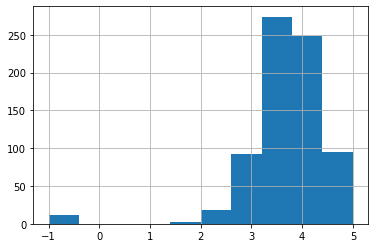

In [7]:
# Check if the 'Rating' is a normal distribution
df['Rating'].hist() # 'Rating' is close to a normal distribution, except for the outliers of -1 

In [8]:
df['Rating'].value_counts()

 3.9    63
 3.8    61
 3.7    61
 3.5    49
 4.0    47
 3.6    46
 3.4    44
 3.3    39
 3.2    35
 4.4    33
 4.3    32
 4.7    31
 4.2    26
 3.1    25
 4.1    19
 2.9    18
 3.0    17
 2.7    14
 2.6    12
-1.0    11
 4.6    10
 4.8     9
 2.4     7
 2.8     7
 4.5     7
 2.1     5
 5.0     5
 1.9     3
 2.3     2
 2.5     2
 2.2     2
Name: Rating, dtype: int64

In [9]:
# Handling the values of -1 in the column Rating
# Replace the value -1 in the column 'Rating' with nan
df['Rating'] = df['Rating'].apply(lambda x: np.nan if x == -1 else x)
df['Rating'].isnull().sum()  # Rating has 11 nan values
# Fill the missing values with the Mean value of the column
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())

<AxesSubplot:>

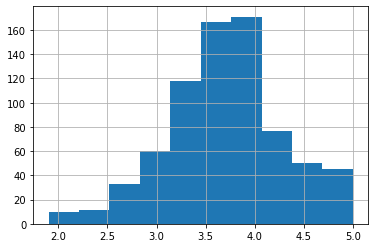

In [10]:
df['Rating'].hist()

<AxesSubplot:>

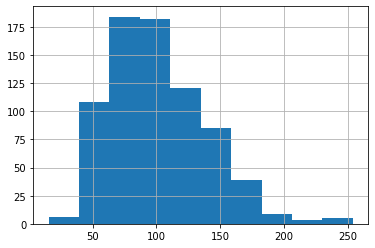

In [11]:
df['Avg Salary(K)'].hist() # Average Salary is a normal distribution

<AxesSubplot:>

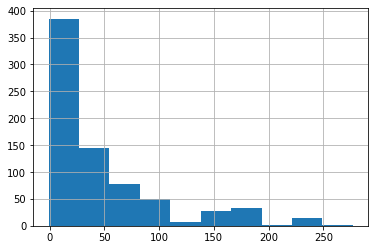

In [12]:
df['Age'].hist()  # 'Age' is not a normal distribution, it is an exponental distribution, the Age is influenced by the outliers (biased)

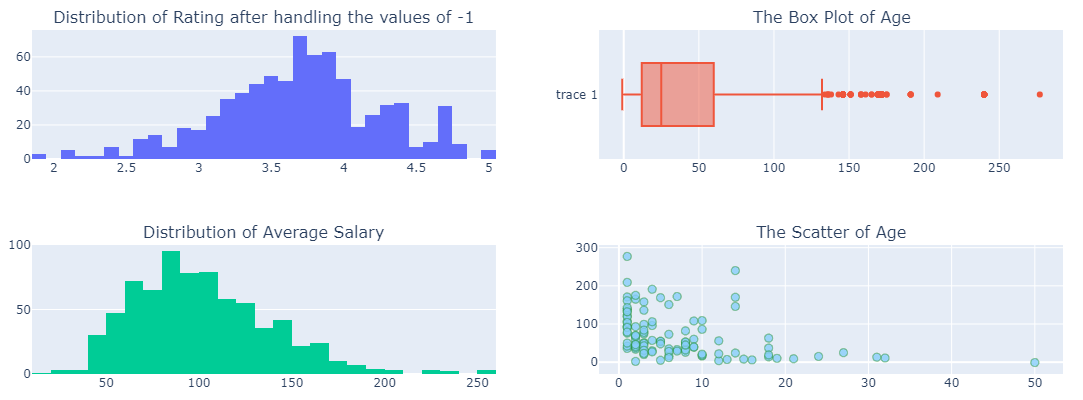

In [13]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=2,
                   subplot_titles=("Distribution of Rating after handling the values of -1", "The Box Plot of Age",
                                   "Distribution of Average Salary", "The Scatter of Age"))

goHistRating = go.Histogram(x=df['Rating']) 
goBoxRating = go.Box(x=df['Age'])
goHistAvgSal = go.Histogram(x=df['Avg Salary(K)'])
goScatterAge = go.Scatter(x=df['Age'].value_counts().values, y=df['Age'].value_counts().index, mode = "markers", 
                          marker = dict(color= 'LightSkyBlue', size=8, opacity = 0.8, line=dict(color='Green', width=0.5) ))

fig.update_layout(width=1000, height=400, showlegend=False,
                  margin=dict(l=20, r=20, t=30, b=10))
fig.add_trace(goHistRating, row=1, col=1)
fig.add_trace(goBoxRating, row=1, col=2)
fig.add_trace(goHistAvgSal, row=2, col=1)
fig.add_trace(goScatterAge, row=2, col=2)
fig.show()

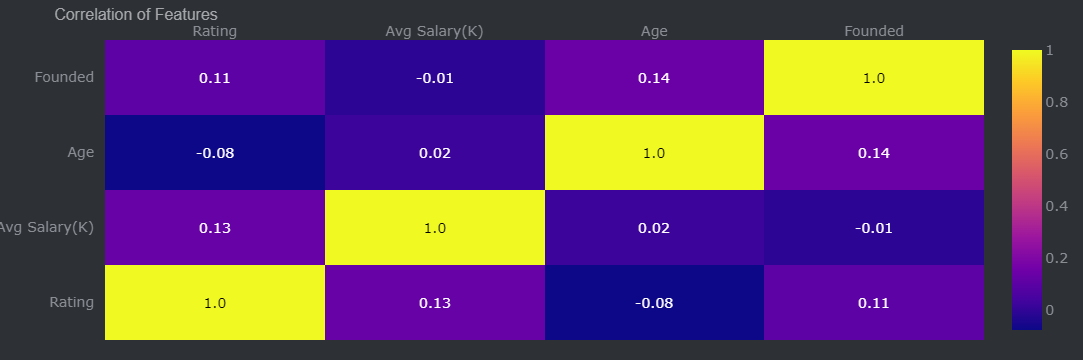

In [14]:
import plotly.offline as py
import plotly.figure_factory as ff

# Heatmap Correlation
corrs = df[['Rating', 'Avg Salary(K)', 'Age', 'Founded']].corr()
fig_heatmap = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text = corrs.round(2).values,
    showscale=True)
fig_heatmap.update_layout(title="Correlation of Features",
                          plot_bgcolor = "#2d3035", paper_bgcolor="#2d3035",
                          title_font=dict(size=16, color="#a5a7ab", family="Muli, sans-serif"),
                          font=dict(size=14, color="#8a8d93"),
                          height=300, width = 500,
                          margin=dict(l=20, r=20, t=40, b=20)) 

In [15]:
df.head(3)

Job Title              Salary Estimate  \
0             Data Scientist   $53K-$91K (Glassdoor est.)   
1  Healthcare Data Scientist  $63K-$112K (Glassdoor est.)   
2             Data Scientist   $80K-$90K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Data Scientist\r\nLocation: Albuquerque, NM\r\...     3.8   
1  What You Will Do:\r\n\r\nI. General Summary\r\...     3.4   
2  KnowBe4, Inc. is a high growth information sec...     4.8   

                                   Company Name         Location  \
0                      Tecolote Research\r\n3.8  Albuquerque, NM   
1  University of Maryland Medical System\r\n3.4    Linthicum, MD   
2                                KnowBe4\r\n4.8   Clearwater, FL   

     Headquarters         Size  Founded   Type of ownership  ... tensor  \
0      Goleta, CA  501 - 1000      1973   Company - Private  ...      0   
1   Baltimore, MD      10000+      1984  Other Organization  ...      0   
2  Clearwater, FL  501 - 1000      2010   Company - Private  ...      0   

  hadoop tableau bi  flink  mongo  google_an   job_title_sim  \
0      0       1  1      0      0          0  data scientist   
1      0       0  0      0      0          0  data scientist   
2      0       0  0      0      0          0  data scientist   

   seniority_by_title Degree  
0                  na      M  
1                  na      M  
2                  na      M  

[3 rows x 41 columns]

In [16]:
df_Location = pd.read_csv('statelatlong.csv')
df_Location = df_Location.rename(columns={'State': 'Job Location'})

df_Location.head(3)

Job Location   Latitude   Longitude     City
0           AL  32.601011  -86.680736  Alabama
1           AK  61.302501 -158.775020   Alaska
2           AZ  34.168219 -111.930907  Arizona

In [17]:
df_Location['Longitude'] = df_Location['Longitude'].apply(lambda x: -81.760254 if x == -83.8330166 else x)
# df_Location['Longitude'].head(2)

In [18]:
df1 = df.merge(df_Location, on = "Job Location") # apply the job location lat long for the df
# df1.columns

In [19]:
df1.head(3)

Job Title             Salary Estimate  \
0  Data Scientist  $53K-$91K (Glassdoor est.)   
1  Data Scientist  $56K-$95K (Glassdoor est.)   
2  Data Scientist  $56K-$95K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Data Scientist\r\nLocation: Albuquerque, NM\r\...     3.8   
1  Sartorius Stedim Data Analytics, a market lead...     3.5   
2  Sartorius Stedim Data Analytics, a market lead...     3.5   

               Company Name         Location        Headquarters  \
0  Tecolote Research\r\n3.8  Albuquerque, NM          Goleta, CA   
1          Sartorius\r\n3.5  Albuquerque, NM  Gottingen, Germany   
2          Sartorius\r\n3.5  Albuquerque, NM  Gottingen, Germany   

            Size  Founded  Type of ownership  ... bi flink mongo google_an  \
0    501 - 1000      1973  Company - Private  ...  1     0     0         0   
1  5001 - 10000      1870   Company - Public  ...  0     0     0         0   
2  5001 - 10000      1870   Company - Public  ...  0     0     0         0   

    job_title_sim  seniority_by_title  Degree   Latitude   Longitude  \
0  data scientist                  na       M  34.166232 -106.026068   
1  data scientist                  na       M  34.166232 -106.026068   
2  data scientist                  na       M  34.166232 -106.026068   

         City  
0  New Mexico  
1  New Mexico  
2  New Mexico  

[3 rows x 44 columns]

1. What states have the most Data Scientist jobs?

In [20]:
df_JobLocation = df1['Job Location'].value_counts().reset_index().rename(columns={'index': 'Location', 'Job Location': 'Job Counts'})
df_JobLocation.head(5)

Location  Job Counts
0       CA         152
1       MA         103
2       NY          72
3       VA          41
4       IL          40

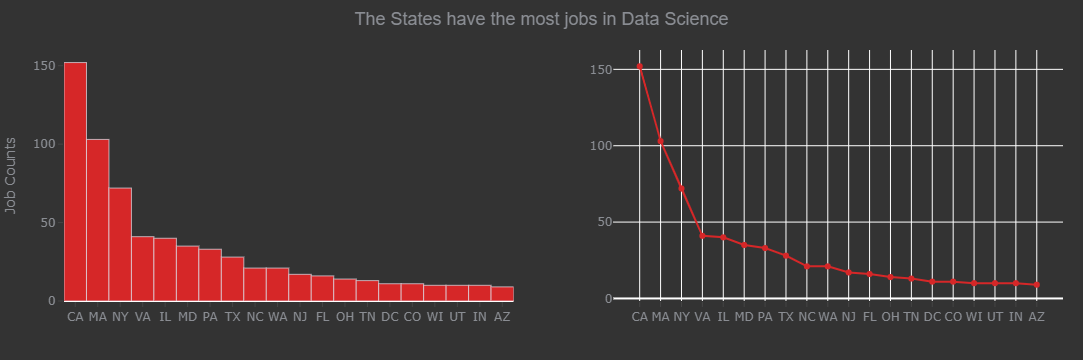

In [21]:
N = 20
fig1 = make_subplots(rows=1, cols=2)
goBar = go.Bar(x=df_JobLocation['Location'][:N], y=df_JobLocation['Job Counts'][:N], width = 1.0)
goScatter = go.Scatter(x=df_JobLocation['Location'][:N], y=df_JobLocation['Job Counts'][:N], mode = "markers + lines")
fig1.add_trace(goBar, row=1, col=1)
fig1.add_trace(goScatter, row=1, col=2)
fig1.update_traces(marker=dict(color='#d62728'))
fig1.update_xaxes(ticks="outside", tickfont=dict(size=12))
fig1.update_yaxes(ticks="outside", col=1, showgrid=False)
fig1.update_layout(margin=dict(t=50, b=10, l=20, r=20),hovermode="y unified", xaxis_title='', title_x=0.5, yaxis_title="Job Counts", height=300,  width=800,
                   showlegend=False,
                   plot_bgcolor='#333', paper_bgcolor='#333',
                   title_text = "The States have the most jobs in Data Science", 
                   title_font=dict(size=18, color='#8a8d93', family="Lato, sans-serif"),
                   font=dict(color='#8a8d93'),
                   # legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5),
                   hoverlabel=dict(bgcolor="black", font_size=13, font_family="Lato, sans-serif"))

From the graph, we see that California is the state that has the most jobs in Data Science.
Likewise, California, Massachusetts, and New York have a deal of jobs in this field.

2. What states have the average minimal and maximal salaries in the U.S?

In [22]:
# Job Location, Lower Salary, Upper Salary
df_MinMaxSal = df1.groupby('Job Location')[['Lower Salary', 'Upper Salary']].mean().reset_index().rename(columns={'Job Location': 'Location', 'Lower Salary': 'Avg Min Salary', 'Upper Salary': 'Avg Max Salary'})
df_MinMaxSal.head()

Location  Avg Min Salary  Avg Max Salary
0       AL       40.875000       75.000000
1       AZ       65.777778      105.555556
2       CA       92.427632      154.598684
3       CO       64.272727      108.090909
4       CT       57.600000       84.600000

In [23]:
import pandasql as pdsql
from pandasql import sqldf, PandaSQL
pdsqlObj = PandaSQL()

In [24]:
# Group the states that have a large amount of jobs, then get Avg Min Sal, and Avg Max Sal
df_jobLocMinMax = pdsqlObj("""SELECT loc.Location, loc."Job Counts", sal."Avg Min Salary" , sal."Avg Max Salary"
                                FROM df_MinMaxSal AS sal
                                INNER JOIN df_JobLocation AS loc
                                ON sal.Location = loc.Location
                                GROUP BY loc.Location
                                ORDER BY loc."Job Counts" DESC """)
df_jobLocMinMax.head()

Location  Job Counts  Avg Min Salary  Avg Max Salary
0       CA         152       92.427632      154.598684
1       MA         103       78.689320      136.300971
2       NY          72       72.125000      125.180556
3       VA          41       70.024390      121.219512
4       IL          40       88.350000      144.975000

In [25]:
# Changing the float number format to 2 decimal numbers for Avg Min Salary 
df_jobLocMinMax['Min Text'] = df_jobLocMinMax['Avg Min Salary'].apply(lambda x: "%.2f" % x)
df_jobLocMinMax.head()

Location  Job Counts  Avg Min Salary  Avg Max Salary Min Text
0       CA         152       92.427632      154.598684    92.43
1       MA         103       78.689320      136.300971    78.69
2       NY          72       72.125000      125.180556    72.12
3       VA          41       70.024390      121.219512    70.02
4       IL          40       88.350000      144.975000    88.35

In [26]:
# Changing the float number format to 2 decimal numbers for Avg Max Salary 
df_jobLocMinMax['Max Text'] = df_jobLocMinMax['Avg Max Salary'].apply(lambda x: "%.2f" % x)
df_jobLocMinMax.head()

Location  Job Counts  Avg Min Salary  Avg Max Salary Min Text Max Text
0       CA         152       92.427632      154.598684    92.43   154.60
1       MA         103       78.689320      136.300971    78.69   136.30
2       NY          72       72.125000      125.180556    72.12   125.18
3       VA          41       70.024390      121.219512    70.02   121.22
4       IL          40       88.350000      144.975000    88.35   144.97

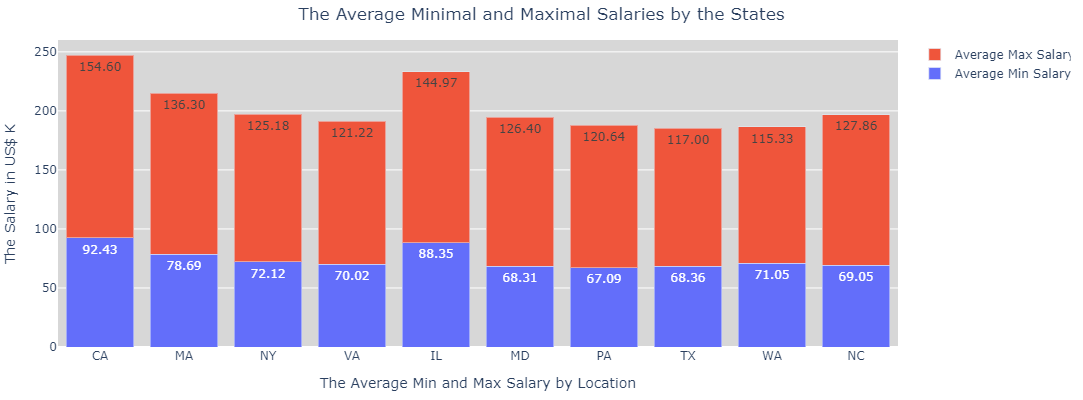

In [27]:
N = 10
fig2 = go.Figure()
goMinBar = go.Bar(name="Average Min Salary", y=df_jobLocMinMax['Avg Min Salary'][:N], x=df_jobLocMinMax['Location'][:N], text = df_jobLocMinMax['Min Text'][:N])
goMaxBar = go.Bar(name="Average Max Salary", y=df_jobLocMinMax['Avg Max Salary'][:N], x=df_jobLocMinMax['Location'][:N],  text = df_jobLocMinMax['Max Text'][:N])
fig2.add_trace(goMinBar)
fig2.add_trace(goMaxBar)
fig2.update_layout(barmode = 'stack',
                   title="The Average Minimal and Maximal Salaries by the States", 
                   title_x = 0.5, width = 600, height=400,
                   plot_bgcolor='#d7d7d7',
                   yaxis_title = "The Salary in US$ K", xaxis_title = "The Average Min and Max Salary by Location", 
                   showlegend=True, margin={"r":20,"t":40,"l":20,"b":20})
# fig2.show()

California is the state that pays the highest average maximal salary, the second one is Illinois, and Massachusetts is going after. 

3. What is the average salary among the states?

In [28]:
df_avgSalLoc = df1.groupby("Job Location")["Avg Salary(K)"].mean().sort_values(ascending=False).reset_index().rename(columns={"Job Location": "Location", "Avg Salary(K)": "Average Salary"})
df_avgSalLoc["Avg Text"] = df_avgSalLoc["Average Salary"].apply(lambda x: "%.2f" % x)
df_avgSalLoc.head()

Location  Average Salary Avg Text
0       CA      123.513158   123.51
1       IL      116.662500   116.66
2       DC      110.181818   110.18
3       MA      107.495146   107.50
4       NJ      104.558824   104.56

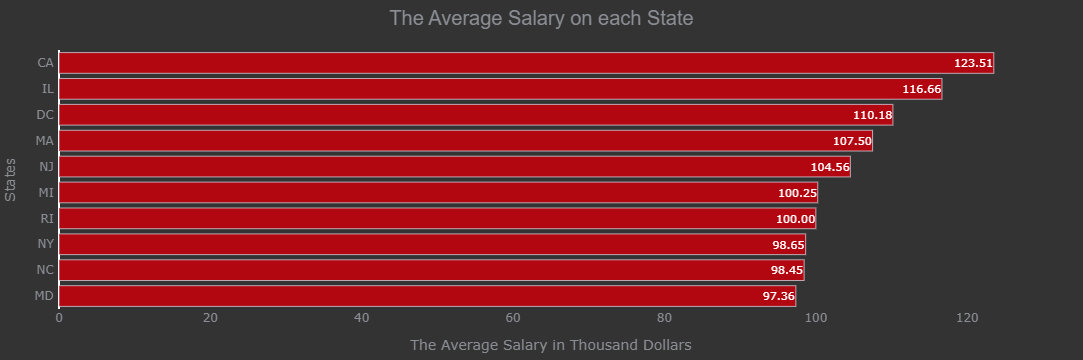

In [29]:
N = 10
fig3 = go.Figure()
goAvgBar = go.Bar(name="Average Salary", x=df_avgSalLoc['Average Salary'][:N], y=df_avgSalLoc['Location'][:N], 
                  text = df_avgSalLoc['Avg Text'][:N], orientation='h',  marker=dict(color='#b20710'))
fig3.add_trace(goAvgBar)
fig3.update_xaxes(showgrid=False)
fig3.update_yaxes(showgrid=False, categoryorder='total ascending', ticksuffix=' ', showline=False)
# fig3.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))
fig3.update_layout(title="The Average Salary on each State",
                   title_x = 0.5, width = 500, height=300,
                   plot_bgcolor='#333', paper_bgcolor='#333',
                   title_font=dict(size=20, color='#8a8d93', family="Lato, sans-serif"), font=dict(color='#8a8d93'),
                   yaxis_title = "States", xaxis_title = "The Average Salary in Thousand Dollars", 
                   showlegend=False, margin=dict(t=50, b=10, l=50, r=40),)

California, Illinois, DC, MA, NJ are the states that have the highest average salary in the U.S

4. What are the top industries with the maximum number of data science-related jobs?

In [30]:
df1['Industry'].value_counts()

Biotech & Pharmaceuticals                   112
Insurance Carriers                           63
Computer Hardware & Software                 59
IT Services                                  50
Health Care Services & Hospitals             49
Enterprise Software & Network Solutions      42
Consulting                                   29
Internet                                     29
Advertising & Marketing                      25
Aerospace & Defense                          25
Consumer Products Manufacturing              20
Research & Development                       19
Colleges & Universities                      16
Energy                                       14
Banks & Credit Unions                        12
Federal Agencies                             11
-1                                           10
Staffing & Outsourcing                       10
Financial Analytics & Research                8
Real Estate                                   8
Lending                                 

In [31]:
# Handling the values of -1 in the column Industry
# Replace the value -1 in the column 'Industry' with nan
df1['Industry'] = df1['Industry'].apply(lambda x: np.nan if x == '-1' else x)
# Fill the missing values in the 'Industry' column with 'Missing'
df1['Industry'].fillna('Missing', inplace=True)

In [32]:
df_JobIndustry = df1['Industry'].value_counts().reset_index().rename(columns={"index": "Industry", "Industry": "Job Counts"}).sort_values(by="Job Counts", ascending=False)
df_JobIndustry.head()

Industry  Job Counts
0         Biotech & Pharmaceuticals         112
1                Insurance Carriers          63
2      Computer Hardware & Software          59
3                       IT Services          50
4  Health Care Services & Hospitals          49

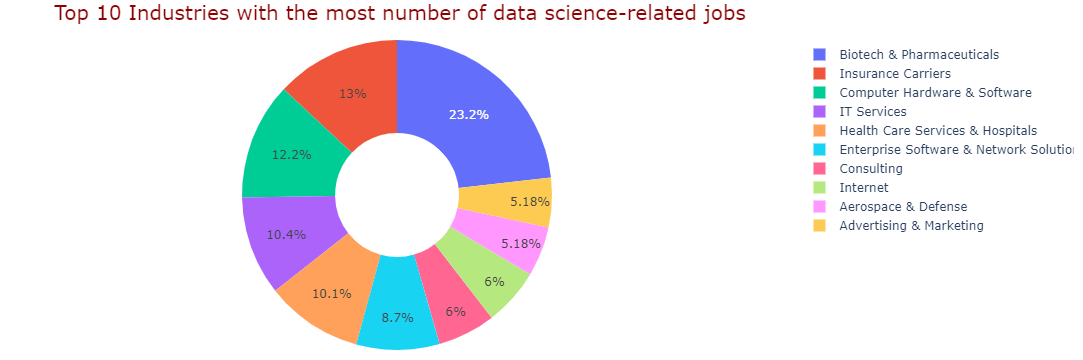

In [33]:
N = 10
fig4 = go.Figure()
goPieIndustry = go.Pie(labels = df_JobIndustry['Industry'][:N], values = df_JobIndustry['Job Counts'][:N],
                      hole = 0.4)
fig4.update_traces(marker=dict(colors=['blue', 'red', 'lightblue', 'orange', 'green']),
                   hoverinfo='label+percent', textinfo='percent', textfont_size=20)
fig4.update_layout(title=f"Top {N} Industries with the most number of data science-related jobs",
                  title_font = dict(size=20,family='Verdana', color='darkred'),
                  width = 800, height=300, margin=dict(t=40, b=10, l=10, r=10))
fig4.add_trace(goPieIndustry)

The Biotech & Pharmaceuticals field has the most data-science related jobs.

5. What companies have the most jobs opening in Data Science?

In [34]:
# Count the company job in percentage 
df_JobCompany = df1["company_txt"].value_counts().sort_values(ascending=False).reset_index().rename(columns={'index': 'Employer', 'company_txt': 'Job Counts'})
df_JobCompany['Percentage'] = df_JobCompany['Job Counts'].apply(lambda x: 100*x/np.sum(df_JobCompany['Job Counts']))
df_JobCompany['Percentage'] = df_JobCompany['Percentage'].apply(lambda x: "%.2f" % x)
df_JobCompany['Founded'] = df1['Founded'].apply(lambda x: x)
df_JobCompany.head()

Employer  Job Counts Percentage  Founded
0                      MassMutual          14       1.89     1973
1               Reynolds American          14       1.89     1870
2          Takeda Pharmaceuticals          14       1.89     1870
3  Software Engineering Institute          11       1.48     1984
4                            PNNL          10       1.35     2008

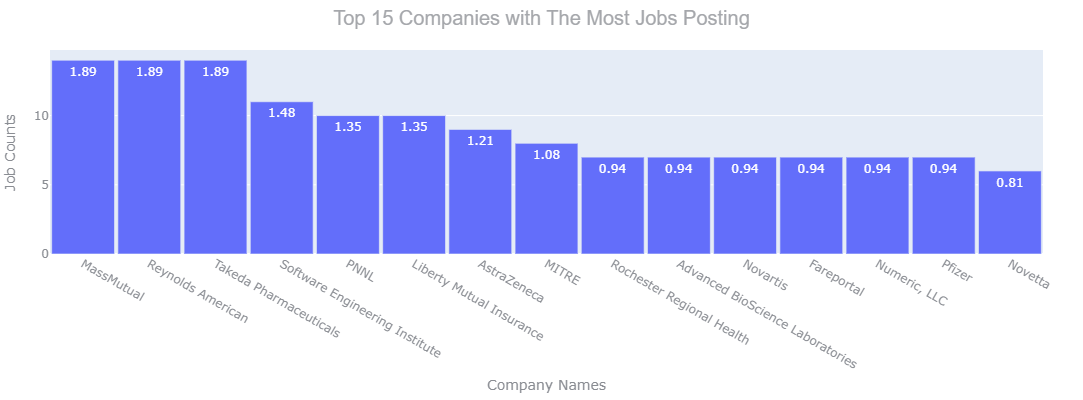

In [35]:
N = 15
fig5 = go.Figure()
goJobCo = go.Bar(x=df_JobCompany["Employer"][:N], y=df_JobCompany["Job Counts"][:N], text=df_JobCompany['Percentage'][:N])
fig.update_yaxes(showgrid=False),
fig.update_xaxes(categoryorder='total descending')
fig5.update_traces(hovertemplate=None, mode='markers', marker=dict(sizemode='area', line_width=2))
fig5.update_layout(margin=dict(t=50, b=10, l=40, r=40), bargap=0.05, title=f"Top {N} Companies with The Most Jobs Posting", title_x = 0.5,
                   hovermode="x unified", xaxis_title='Company Names ', yaxis_title='Job Counts',
                   # paper_bgcolor='rgb(243, 243, 243)', plot_bgcolor='rgb(243, 243, 243)',
                  width=600, height=400, title_font=dict(size=20, color='#a5a7ab', family="Lato, sans-serif"), font=dict(color='#8a8d93'))
fig5.add_trace(goJobCo)

6. What job titles have the most number of jobs?

In [36]:
df_JobTitle = df1["job_title_sim"].value_counts().sort_values(ascending=False).reset_index().rename(columns={'index': 'Title', 'job_title_sim': 'Job Counts'})
df_JobTitle['Percentage'] = df_JobTitle['Job Counts'].apply(lambda x: 100*x/np.sum(df_JobCompany['Job Counts']))
df_JobTitle['Percentage'] = df_JobTitle['Percentage'].apply(lambda x: "%.2f" % x)
df_JobTitle.head()

Title  Job Counts Percentage
0             data scientist         313      42.18
1            other scientist         143      19.27
2              data engineer         119      16.04
3                    analyst         101      13.61
4  machine learning engineer          22       2.96

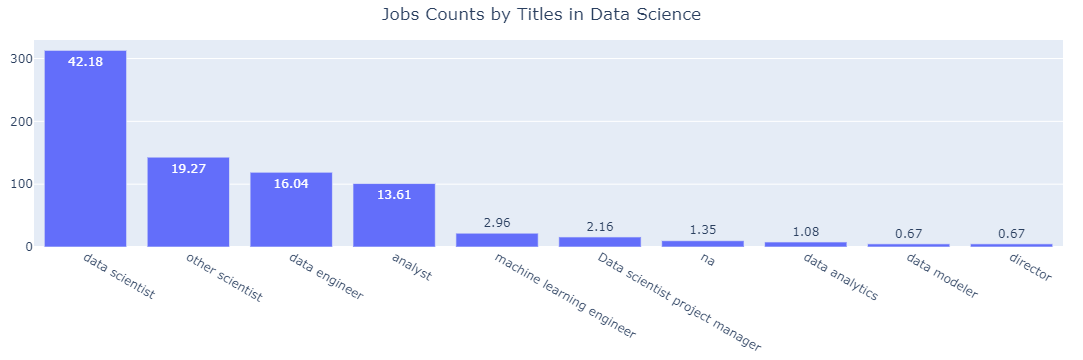

In [37]:
N = 10
fig6 = go.Figure()
goJobTitle = go.Bar(x = df_JobTitle['Title'][:N], y = df_JobTitle['Job Counts'][:N], text= df_JobTitle['Percentage'][:N])
fig6.add_trace(goJobTitle)
fig6.update_layout(title="Jobs Counts by Titles in Data Science", title_x = 0.5, width=600, height=300, margin=dict(l=20, r=20, t=40, b=20))

7. The Average Salary of Job Titles that have the most jobs

In [38]:
df_JobTitSal = df1.groupby('job_title_sim')["Avg Salary(K)"].mean().reset_index().rename(columns={'job_title_sim': 'Job Title', "Avg Salary(K)": 'Average Salary'}).sort_values('Average Salary', ascending=False)
df_JobTitSal["Job Title"] = df_JobTitSal["Job Title"].apply(lambda x: 'missing title' if x == 'na' else x)
df_JobTitSal.head()

Job Title  Average Salary
6                   director      130.800000
7  machine learning engineer      126.431818
5             data scientist      118.293930
3              data engineer      105.403361
8              missing title       91.450000

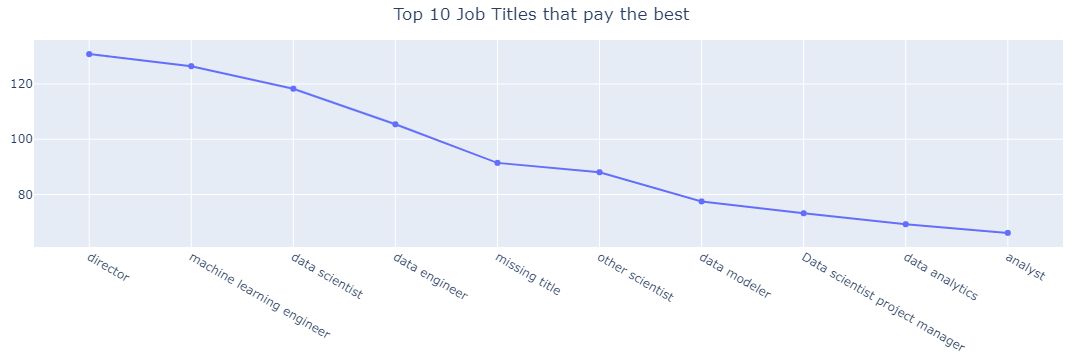

In [39]:
N = 10
fig6 = go.Figure()
goJobTitSal = go.Scatter(mode = "markers + lines", x = df_JobTitSal['Job Title'][:N], y = df_JobTitSal['Average Salary'][:N])
fig6.add_trace(goJobTitSal)
fig6.update_layout(title=f"Top {N} Job Titles that pay the best", title_x = 0.5, width=600, height=300, margin=dict(l=20, r=20, t=40, b=20))

8. What are the skills required for each title job?

In [40]:
df_skills = df1[['job_title_sim','Python', 'spark', 'aws', 'excel','sql','sas','keras','pytorch','scikit','tensor','hadoop','tableau','bi','flink','mongo','google_an','Avg Salary(K)']]
df_skills['job_title_sim'] = df_skills['job_title_sim'].apply(lambda x: 'missing title' if x=='na' else x)
df_skills.head()

job_title_sim  Python  spark  aws  excel  sql  sas  keras  pytorch  \
0  data scientist       1      0    0      1    0    1      0        0   
1  data scientist       1      0    0      1    0    0      0        0   
2  data scientist       1      0    0      1    0    0      0        0   
3  data scientist       1      0    0      0    0    0      0        0   
4  data scientist       0      0    0      1    0    0      0        0   

   scikit  tensor  hadoop  tableau  bi  flink  mongo  google_an  Avg Salary(K)  
0       0       0       0        1   1      0      0          0           72.0  
1       0       0       0        0   0      0      0          0           75.5  
2       0       0       0        0   0      0      0          0           75.5  
3       0       0       0        0   0      0      0          0           87.5  
4       0       0       0        0   0      0      0          0           73.5

In [41]:
# Salary with the skill in Python 
df_PythonSkill = pd.pivot_table(df1[df1['Python'] == 1], index = ['Job Location', 'job_title_sim'], values = 'Avg Salary(K)').sort_values('Avg Salary(K)', ascending = False).reset_index()
df_PythonSkill.head()

Job Location              job_title_sim  Avg Salary(K)
0           CA  machine learning engineer     177.300000
1           IL             data scientist     157.750000
2           MA            other scientist     150.700000
3           NJ             data scientist     145.666667
4           DC             data scientist     145.000000

In [42]:
# fig7 = go.Figure()
# goPythonSkill = go.Bar(x = df_PythonSkill['job_title_sim'], y = df_PythonSkill['Avg Salary(K)'])
# fig7.add_trace(goPythonSkill)
# fig7.update_layout(title=f"Job Salary with the skill in Python", title_x = 0.5, width=300, height=500, margin=dict(l=20, r=20, t=40, b=20))

In [43]:
df_skills['Skill Counts'] = df_skills.loc[:, 'Python': 'google_an'].sum(axis=1)
df_skills.head()

job_title_sim  Python  spark  aws  excel  sql  sas  keras  pytorch  \
0  data scientist       1      0    0      1    0    1      0        0   
1  data scientist       1      0    0      1    0    0      0        0   
2  data scientist       1      0    0      1    0    0      0        0   
3  data scientist       1      0    0      0    0    0      0        0   
4  data scientist       0      0    0      1    0    0      0        0   

   scikit  tensor  hadoop  tableau  bi  flink  mongo  google_an  \
0       0       0       0        1   1      0      0          0   
1       0       0       0        0   0      0      0          0   
2       0       0       0        0   0      0      0          0   
3       0       0       0        0   0      0      0          0   
4       0       0       0        0   0      0      0          0   

   Avg Salary(K)  Skill Counts  
0           72.0             5  
1           75.5             2  
2           75.5             2  
3           87.5             1  
4           73.5             1

In [44]:
df_JobSkill = df_skills[['job_title_sim', 'Avg Salary(K)','Skill Counts']].rename(columns={'job_title_sim': 'Title', 'Avg Salary(K)': 'Average Salary'})
df_JobSkill.head()

Title  Average Salary  Skill Counts
0  data scientist            72.0             5
1  data scientist            75.5             2
2  data scientist            75.5             2
3  data scientist            87.5             1
4  data scientist            73.5             1

In [45]:
df_JobSalSkill = pdsqlObj("""SELECT DISTINCT Title, "Average Salary", "Skill Counts"
                            FROM df_JobSkill
                            GROUP BY Title
                            ORDER BY "Average Salary" DESC
                            """)
df_JobSalSkill.head()

Title  Average Salary  Skill Counts
0  machine learning engineer           125.0             6
1             data analytics           114.5             4
2              data engineer           109.0             1
3               data modeler           106.5             0
4                   director           101.0             0

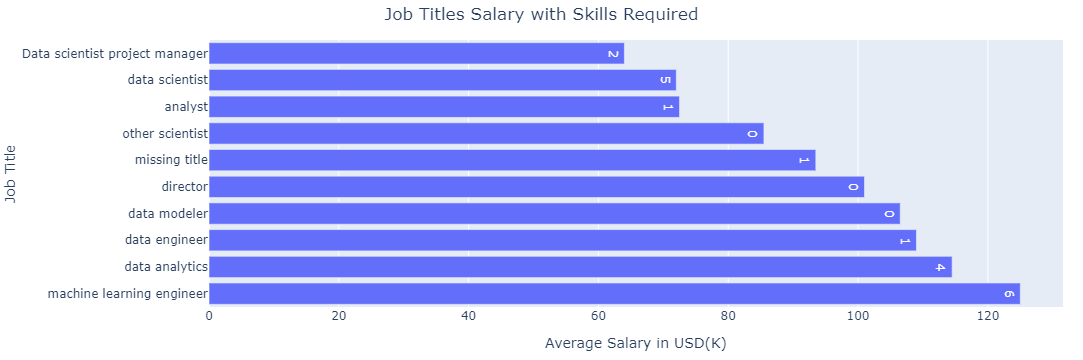

In [46]:
fig8 = go.Figure()
goJobSalSkill = go.Bar(y = df_JobSalSkill['Title'], x = df_JobSalSkill['Average Salary'], text= df_JobSalSkill['Skill Counts'], orientation='h')
fig8.add_trace(goJobSalSkill)
fig8.update_layout(title=f"Job Titles Salary with Skills Required", title_x = 0.5, width=600, height=300, margin=dict(l=20, r=20, t=40, b=20),
                   yaxis_title='Job Title', xaxis_title='Average Salary in USD(K)',
                  )

In [47]:
df_dataScientist = pd.pivot_table(df1[df1['job_title_sim'] == 'data scientist'], index = 'Job Location', values = 'Avg Salary(K)').sort_values('Avg Salary(K)', ascending = False).reset_index()
df_dataScientist.head()

Job Location  Avg Salary(K)
0           DC     149.000000
1           IL     147.095238
2           CA     141.047297
3           UT     140.500000
4           MO     127.666667

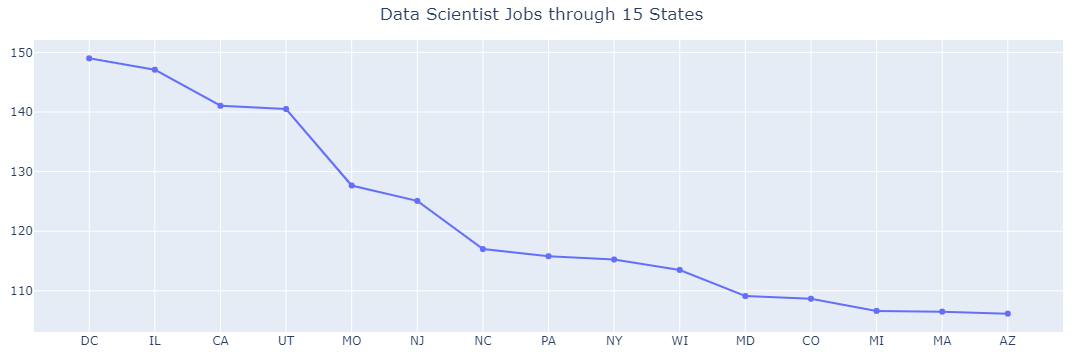

In [48]:
N = 15
fig9 = go.Figure()
goDataScience = go.Scatter(mode = "markers + lines", x = df_dataScientist['Job Location'][:N], y = df_dataScientist['Avg Salary(K)'][:N])
fig9.add_trace(goDataScience)
fig9.update_layout(title=f"Data Scientist Jobs through {N} States", title_x = 0.5, width=500, height=200, margin=dict(l=20, r=20, t=40, b=20))

9. The relationship between the average wage and education?

In [49]:
df1['job_title_sim'] = df1['job_title_sim'].apply(lambda x: 'missing title' if x=='na' else x)
df_wageEdu = pd.pivot_table(df1, index = 'job_title_sim', columns = "Degree", values = 'Avg Salary(K)', aggfunc = ['mean','count']).rename(columns={"mean":"Avg Salary(K)"})
df_wageEdu

Avg Salary(K)                          count  \
Degree                                     M           P          na      M   
job_title_sim                                                                 
Data scientist project manager     83.800000         NaN   68.409091    5.0   
analyst                            61.333333         NaN   67.858108   27.0   
data analytics                     82.500000         NaN   61.300000    3.0   
data engineer                     103.714286  132.250000  105.469512   35.0   
data modeler                       63.166667         NaN   99.000000    3.0   
data scientist                    117.847826  129.578947  115.613139  138.0   
director                                 NaN  150.666667  101.000000    NaN   
machine learning engineer         125.000000  134.200000  118.950000    2.0   
missing title                      92.000000         NaN   91.083333    4.0   
other scientist                   102.771429  100.509259   66.064815   35.0   

                                             
Degree                             P     na  
job_title_sim                                
Data scientist project manager   NaN   11.0  
analyst                          NaN   74.0  
data analytics                   NaN    5.0  
data engineer                    2.0   82.0  
data modeler                     NaN    2.0  
data scientist                  38.0  137.0  
director                         3.0    2.0  
machine learning engineer       10.0   10.0  
missing title                    NaN    6.0  
other scientist                 54.0   54.0

The Master Degree is prefered in Data Science. The PhD degree is paid higher than the others. 

In [50]:
df1.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer provided', 'Lower Salary', 'Upper Salary',
       'Avg Salary(K)', 'company_txt', 'Job Location', 'Age', 'Python',
       'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit',
       'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an',
       'job_title_sim', 'seniority_by_title', 'Degree', 'Latitude',
       'Longitude', 'City'],
      dtype='object')

In [51]:
df_jobLocMinMax.head()

Location  Job Counts  Avg Min Salary  Avg Max Salary Min Text Max Text
0       CA         152       92.427632      154.598684    92.43   154.60
1       MA         103       78.689320      136.300971    78.69   136.30
2       NY          72       72.125000      125.180556    72.12   125.18
3       VA          41       70.024390      121.219512    70.02   121.22
4       IL          40       88.350000      144.975000    88.35   144.97

In [52]:
df_JobTitle.head()

Title  Job Counts Percentage
0             data scientist         313      42.18
1            other scientist         143      19.27
2              data engineer         119      16.04
3                    analyst         101      13.61
4  machine learning engineer          22       2.96

In [53]:
df_JobIndustry.head()

Industry  Job Counts
0         Biotech & Pharmaceuticals         112
1                Insurance Carriers          63
2      Computer Hardware & Software          59
3                       IT Services          50
4  Health Care Services & Hospitals          49

In [54]:
df_JobCompany.head()

Employer  Job Counts Percentage  Founded
0                      MassMutual          14       1.89     1973
1               Reynolds American          14       1.89     1870
2          Takeda Pharmaceuticals          14       1.89     1870
3  Software Engineering Institute          11       1.48     1984
4                            PNNL          10       1.35     2008

In [55]:
df1.head(2)

Job Title             Salary Estimate  \
0  Data Scientist  $53K-$91K (Glassdoor est.)   
1  Data Scientist  $56K-$95K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Data Scientist\r\nLocation: Albuquerque, NM\r\...     3.8   
1  Sartorius Stedim Data Analytics, a market lead...     3.5   

               Company Name         Location        Headquarters  \
0  Tecolote Research\r\n3.8  Albuquerque, NM          Goleta, CA   
1          Sartorius\r\n3.5  Albuquerque, NM  Gottingen, Germany   

            Size  Founded  Type of ownership  ... bi flink mongo google_an  \
0    501 - 1000      1973  Company - Private  ...  1     0     0         0   
1  5001 - 10000      1870   Company - Public  ...  0     0     0         0   

    job_title_sim  seniority_by_title  Degree   Latitude   Longitude  \
0  data scientist                  na       M  34.166232 -106.026068   
1  data scientist                  na       M  34.166232 -106.026068   

         City  
0  New Mexico  
1  New Mexico  

[2 rows x 44 columns]

In [56]:
df_JobStateCounts = df1['City'].value_counts().reset_index().rename(columns={'index': 'State', 'City': 'Job Counts'})#.sort_values(ascending=False)
df_LatLon = df1.loc[:,['Latitude', 'Longitude', 'Founded','City']].rename(columns={'City': 'State'})
df_JC = pd.merge(df_JobStateCounts, df_LatLon, on='State')  #how='inner'
df_JC.drop_duplicates('State', inplace=True)
df_JC.head()

State  Job Counts   Latitude   Longitude  Founded
0       California         152  37.271875 -119.270415     2005
152  Massachusetts         103  42.062940  -71.718067     1781
255       New York          72  40.705626  -73.979680     1998
327       Virginia          41  38.003386  -79.458786     1968
368       Illinois          40  39.739318  -89.504139     1995

In [57]:
# Create a state jobs df 
# df_jobCountStates = df1.loc[:,['Location', 'Latitude', 'Longitude', 'Founded','City']].rename(columns={'City': 'State'})
# df_JobStateCounts = df_jobCountStates.groupby(['State', 'Latitude', 'Longitude', 'Founded'])['State'].agg([('Job Counts', 'count')]).reset_index()
# df_JobStateCounts.sort_values(by='Job Counts', ascending=False).head()

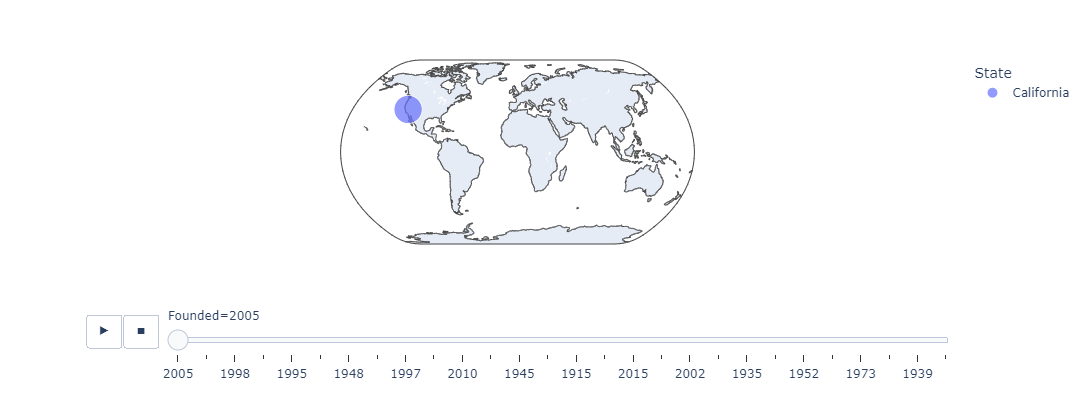

In [110]:
fig = px.scatter_geo(df_JC, lat = 'Latitude', lon='Longitude', color='State', hover_name='State', 
                    size='Job Counts', projection="natural earth", animation_frame = 'Founded')
fig.update_layout(height=400, width=600)
fig.show()

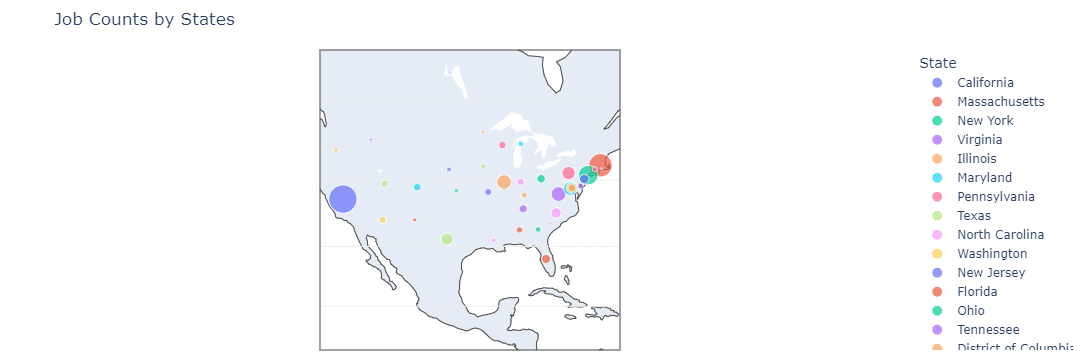

In [112]:
figx = px.scatter_geo(df_JC, lat='Latitude', lon='Longitude', color = 'State', hover_name='State',
                     size='Job Counts', projection='mercator')
figx.update_geos(fitbounds='locations', resolution=110,lataxis_showgrid=True,
                showsubunits=True, subunitcolor='Red', 
                countrycolor='Blue')  #showcountries=True, 
figx.update_layout(height=300, width=500, margin={'r': 20, 't':50, 'l':40, 'b':10}, showlegend=True, title='Job Counts by States')

figx.add_annotation(x=100, y=80)

figx.show()


In [60]:
figW = go.FigureWidget(figx)
butW = widgets.Button(description='OK!')
widgets.VBox([butW, figW])                 

    'data': [{'geo': 'geo',
    …

In [105]:
fig = px.scatter_mapbox(df_JC, lat='Latitude', lon='Longitude', hover_name='State', 
                       hover_data =['Job Counts'], size='Job Counts', zoom=2.5,
                       height=300, width=600, color='State', color_discrete_sequence=['gray', 'red', 'yellow'],
                       mapbox_style='stamen-terrain')
# fig.update_layout(mapbox_style='open-street-map')
fig.update_geos(fitbounds='locations', showcountries=True, countrycolor='Blue')
fig.update_layout(margin={'r':0,'t':0, 'l':0, 'b':0}, showlegend=False)
# fig.show()

figW = go.FigureWidget(fig)
butW = widgets.Button(description='Click here')
widgets.VBox([butW, figW])
# figW


    'data': [{'customdata…

In [62]:
wSel = widgets.Select(description='Select', options=['A', 'B', 'C'])
wOut = widgets.Output()
display(widgets.VBox([wSel, wOut]))
with wOut:
    # fig.show()
    display(fig)
                      

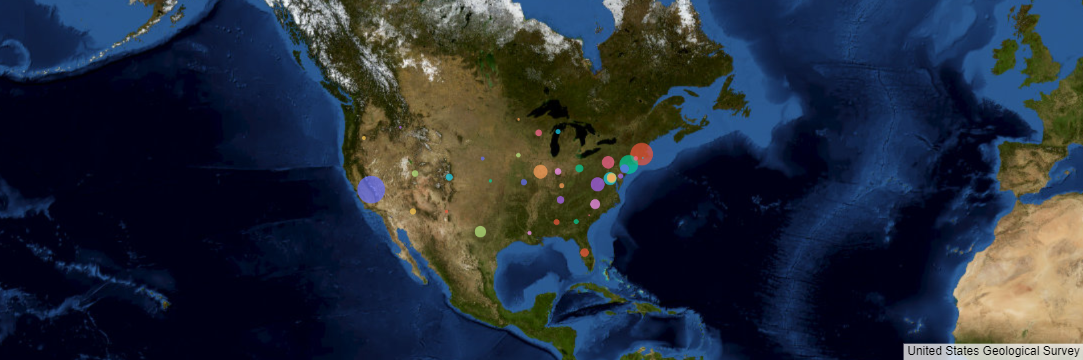

In [118]:
fig = px.scatter_mapbox(df_JC, lat='Latitude', lon='Longitude',
                  hover_name='State', hover_data=['Job Counts'], size='Job Counts', 
                        zoom=2, height=300, width=400,
                        color='State') #, color_discrete_sequence=['gray', 'red', 'yellow',])
fig.update_layout(mapbox_style="white-bg",  mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "United States Geological Survey",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
            ]
        }])
fig.update_layout(margin={'r':0, 't':0, 'l':0, 'b':0}, showlegend=False)
fig.show()


In [119]:
fig1 = px.scatter_mapbox(df_JC, lat="Latitude", lon="Longitude", hover_name="State",
                         hover_data=["Job Counts"], size="Job Counts", zoom=2, height=300, width=600,
                         color="State") #, color_discrete_sequence=["gray", "red", "yellow"])
fig1.update_layout(mapbox_style="white-bg", 
                  mapbox_layers=[{
                      "below": "trace",
                      "sourcetype": "raster",
                      "sourceattribution": "United States Geological Survey",
                      "source":[
                        "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
                      ]
                  }
                  ])
fig1.update_layout(margin={"r":0, "t": 0, "l":0, "b":0}, dragmode=False)
figW1 = go.FigureWidget(fig1)
butW1 = widgets.Button()
widgets.HBox([butW, figW])

    'data': [{'customdata…

In [65]:
## Thử sửa lỗi bằng cách thay đổi mã nguồn của thử viện plotly
## Link: https://github.com/plotly/plotly.py/issues/2570
import os
basedatatypesPath = os.path.join(os.path.dirname(os.__file__), 'site-packages', 'plotly', 'basedatatypes.py')

# read basedatatypes.py
with open(basedatatypesPath, 'r') as f:
    lines = f.read()
find = 'if not BaseFigure._is_key_path_compatible(key_path_str, self.layout):'
replace = """if not BaseFigure._is_key_path_compatible(key_path_str, self.layout):
                if key_path_str == "mapbox._derived":
                    return """

# add new text
lines = lines.replace(find, replace)

# overwrite old 'basedatatypes.py'
with open(basedatatypesPath, 'w') as f:
    f.write(lines)

In [98]:
# Map with graph_object.Scattergeo
mapGo = go.Scattergeo(lat=df_JC["Latitude"], lon=df_JC["Longitude"],
                      hoverinfo =  'text',
                      mode = 'markers',
                      text = df_JC[["State", "Job Counts"]],
                      name = "Major Cities",
                      # hovertext = df_JobStateCounts["Job Counts"],
                      marker=dict(size=df_JC["Job Counts"]/10,
                             opacity=0.8, symbol='circle',
                             # line = dict(width=1,
                             #             color='rgba(102,102,102)')
                             ))
fig = go.Figure(mapGo)
fig.update_geos(
    resolution=110, scope="usa", 
    center=dict(lat=38, lon=-98),
    showcoastlines=True, coastlinecolor="RebeccaPurple",
    showland=True, landcolor="Orange",
    showocean=True, oceancolor="LightBlue",
    showlakes=True, lakecolor="Gray",
    showrivers=True, rivercolor="Red",
    showcountries=True, countrycolor="RebeccaPurple",
    lataxis_showgrid=True, lonaxis_showgrid=True, 
)
fig.update_layout(height=250, width=500, margin={'r':0, 't':0, 'l':0,'b':0}) #, title_text='Jobs Counts through the States', title_x=0.5)
figW = go.FigureWidget(fig)
butW = widgets.Button(description="Click here")
widgets.HBox([butW, figW])

    'data': [{'hoverinfo'…

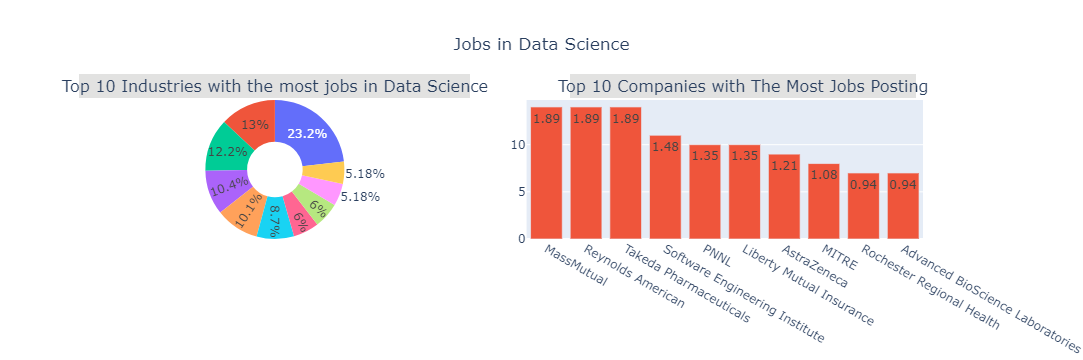

In [121]:
N = 10
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=(f"Top {N} Industries with the most jobs in Data Science",
                                    f"Top {N} Companies with The Most Jobs Posting"), 
                    column_widths =[0.6, 0.7],
                    specs=[[{"type": "domain"}, {"type": "xy"}]]
                   )
goPieIndustry = go.Pie(labels = df_JobIndustry['Industry'][:N], values = df_JobIndustry['Job Counts'][:N],
                hole = 0.4, showlegend=False)
goJobCo = go.Bar(x=df_JobCompany["Employer"][:N], y=df_JobCompany["Job Counts"][:N], text=df_JobCompany['Percentage'][:N], showlegend=False)

fig.add_trace(goPieIndustry, row=1, col=1)
fig.add_trace(goJobCo, row=1, col=2)

fig.update_annotations(x=0.4, y=1.6, selector={'text': f"Top {N} Industries with the Most Jobs in Data Science"})
fig.update_annotations(x=0.78, y=1, selector={'text': f"Top {N} Companies with The Most Jobs Posting"}, bgcolor='#E2E2E1', bordercolor='#FFFFFF', borderwidth=2)

fig.update_layout(margin=dict(t=100, b=10, l=10, r=20), title_text="Jobs in Data Science", title_x=0.5)

fig['layout']['annotations'][0].update(align='center', bgcolor='#E2E2E1', bordercolor='#FFFFFF', borderwidth=2) 
# print(fig['layout']['annotations'][0])
# print(fig['layout'])

# https://stackoverflow.com/questions/41402256/how-do-i-annotate-each-subplot-separately-in-plotly-python

fig.show()

In [68]:
# df_JobIndustry = df_JobIndustry.rename(columns={'Industry': 'Job Industry', 'Job Counts': 'Industry Job Counts'})
# df_JobCompany = df_JobCompany.rename(columns={'Job Counts': 'Company Job Counts', 'Percentage': 'Company Job Percentage'})
# df_Jobs = pd.concat([df_JobIndustry['Job Industry'], df_JobIndustry["Job Industry Counts"],
#             df_JobCompany["Employer"],df_JobCompany["Company Job Counts"], df_JobCompany['Company Job Percentage']], axis=1, join='inner')
# df_Jobs.head(3)

In [69]:
df1.head(3)

Job Title             Salary Estimate  \
0  Data Scientist  $53K-$91K (Glassdoor est.)   
1  Data Scientist  $56K-$95K (Glassdoor est.)   
2  Data Scientist  $56K-$95K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Data Scientist\r\nLocation: Albuquerque, NM\r\...     3.8   
1  Sartorius Stedim Data Analytics, a market lead...     3.5   
2  Sartorius Stedim Data Analytics, a market lead...     3.5   

               Company Name         Location        Headquarters  \
0  Tecolote Research\r\n3.8  Albuquerque, NM          Goleta, CA   
1          Sartorius\r\n3.5  Albuquerque, NM  Gottingen, Germany   
2          Sartorius\r\n3.5  Albuquerque, NM  Gottingen, Germany   

            Size  Founded  Type of ownership  ... bi flink mongo google_an  \
0    501 - 1000      1973  Company - Private  ...  1     0     0         0   
1  5001 - 10000      1870   Company - Public  ...  0     0     0         0   
2  5001 - 10000      1870   Company - Public  ...  0     0     0         0   

    job_title_sim  seniority_by_title  Degree   Latitude   Longitude  \
0  data scientist                  na       M  34.166232 -106.026068   
1  data scientist                  na       M  34.166232 -106.026068   
2  data scientist                  na       M  34.166232 -106.026068   

         City  
0  New Mexico  
1  New Mexico  
2  New Mexico  

[3 rows x 44 columns]

In [137]:
@widgets.interact(option=['Job Title', 'Degree', 'City'], N=(5,20,1))
def function1(option, N):
    df_counts = df1[option].value_counts()
    # print(df_counts)
    fig = make_subplots(rows=1, cols=2, column_widths =[0.4, 0.6],
                    subplot_titles=(f"Top {N} Jobs by Portions",
                                    f"Top {N} Jobs by Total"), 
                    specs=[[{"type": "domain"}, {"type": "xy"}]])
    goPie = go.Pie(labels = df_counts.index[:N], values = df_counts.values[:N], hole = 0.4, showlegend=False,
                  )  #textinfo='label+percent'
    goBar = go.Bar(x=df_counts.index[:N], y=df_counts.values[:N], text=df_counts.values[:N], showlegend=False, textposition='inside')

    fig.add_trace(goPie, row=1, col=1)
    fig.add_trace(goBar, row=1, col=2)
    fig.update_layout(margin=dict(t=80, b=10, l=10, r=20), title_text=f"Jobs in Data Science: {option}", title_x=0.5)
    fig.show()
    
    # print(fig['data'][1]['textposition']=='inside')
    

interactive(children=(Dropdown(description='option', options=('Job Title', 'Degree', 'City'), value='Job Title…

In [71]:
df_JC.head()

State  Job Counts   Latitude   Longitude  Founded
0       California         152  37.271875 -119.270415     2005
152  Massachusetts         103  42.062940  -71.718067     1781
255       New York          72  40.705626  -73.979680     1998
327       Virginia          41  38.003386  -79.458786     1968
368       Illinois          40  39.739318  -89.504139     1995

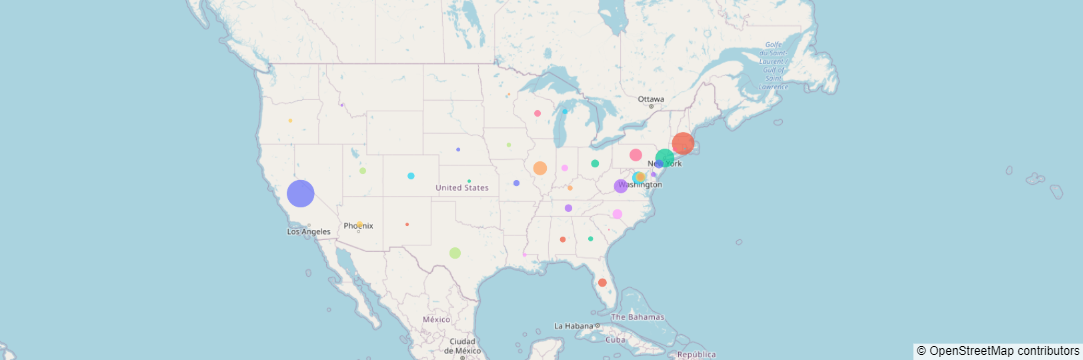

In [138]:
figMap = px.scatter_mapbox(df_JC, lat='Latitude', lon='Longitude',
                           hover_name = 'State', hover_data=['Job Counts'],
                           size='Job Counts', zoom=2.5, height=250, width=600,
                           color=df_JC['State'])  # color_discrete_sequence=['blue', 'red', 'yellow'])
# figMap.update_layout(mapbox_style='stamen-terrain')
figMap.update_layout(mapbox_style='open-street-map')
figMap.update_geos(fitbounds='locations', showcountries=True,
                   countrycolor='Blue')
figMap.update_layout(margin={'r':0, 't':0, 'l':0, 'b':0}, showlegend=False)
figMap.show()

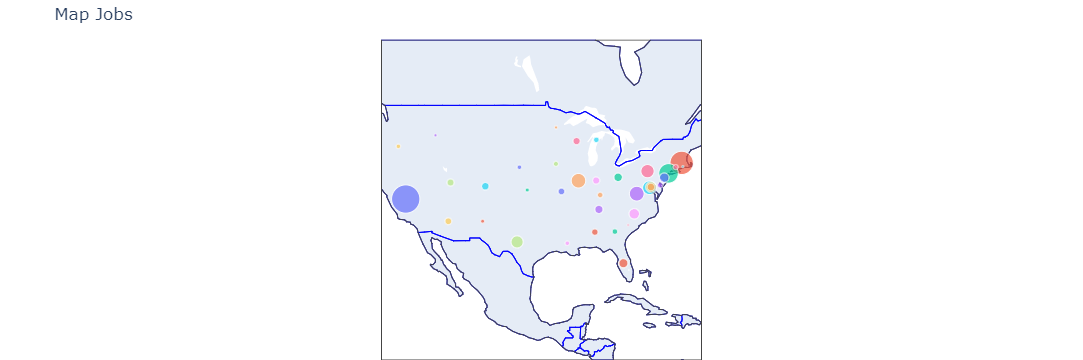

In [142]:
figMap2 = px.scatter_geo(df_JC, lat="Latitude", lon="Longitude",
                         hover_name="State", hover_data=["Job Counts"],
                         size="Job Counts", height=300, width=400,
                         color=df_JC["State"], projection="mercator",
                        fitbounds="locations", #text=df_JC["State"], 
                         title = "Map Jobs")
figMap2.update_geos(showcountries=True, countrycolor="Blue")
figMap2.update_layout(margin={"r":0, "t":40, "l":0, "b":0}, showlegend=False)
figMap2


In [74]:
# Mean Average Salary
df1['Sector'] = df1['Sector'].apply(lambda x: 'missing' if x=='-1' else x)
df1['Degree'] = df1['Degree'].apply(lambda x: "Not Mention" if x=='na' else x)
df1 = df1.rename(columns={'City': 'State', "Avg Salary(K)": "Average Salary"})
# df1.head(1)

# Sector
avgSalSector = df1.groupby("Sector")["Average Salary"].mean()
# State
avgSalState = df1.groupby("State")["Average Salary"].mean()
# avgSalState
# Job Title
avgSalTitle = df1.groupby("job_title_sim")["Average Salary"].mean()
# avgSalTitle
# Degree
avgSalDegree = df1.groupby("Degree")["Average Salary"].mean()
# avgSalDegree
# Company
avgSalCompany = df1.groupby("company_txt")["Average Salary"].mean()
# avgSalCompany

# df1.columns

In [75]:
def function2(option, state='All'):
    if 'All'.lower() in state.lower():
        df_temp = df1
    else:
        df_temp = df1[df1['State'] == state]
    df_counts = df_temp.groupby(option)['Average Salary'].mean()
    fig = make_subplots(rows=1, cols=2, subplot_titles=("Average Salary by Values", "Average Salary by Portions"),
                        column_width=[0.6, 0.4],
                        specs=[[{"type": "xy"}, {"type": "domain"}]])
    goBar = go.Bar(x=df_counts.index, y=df_counts.values, width=0.3,showlegend=False)
    goPie = go.Pie(labels=df_counts.index, values=df_counts.values, showlegend=True, hole=.3)
    fig.add_trace(goBar, row=1, col=1)
    fig.add_trace(goPie, row=1, col=2)
    fig.update_layout(width=600, height=400, margin={"r":0, "t":100, "l":0, "b":0},
                     title=f"Average Salary by: {option}", showlegend=False)
    fig.show()
                     

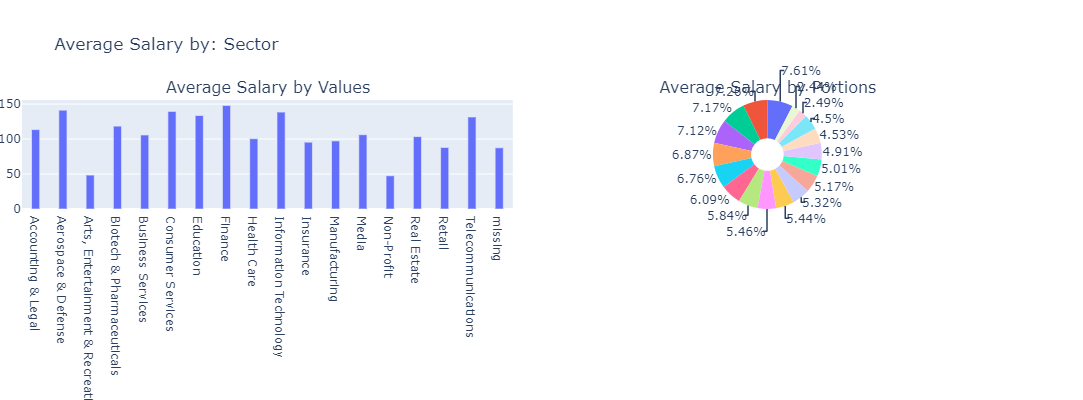

In [76]:
function2("Sector", "California")

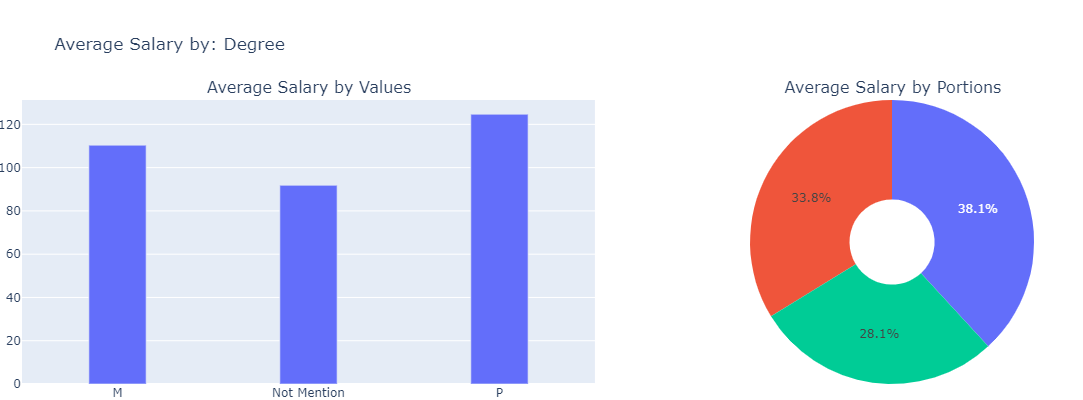

In [77]:
function2("Degree", "Massachusetts")

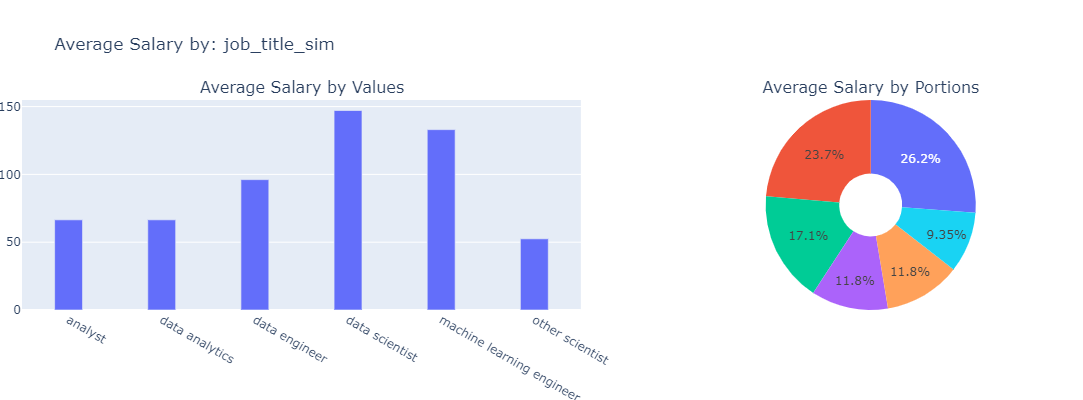

In [78]:
function2("job_title_sim", "Illinois") 

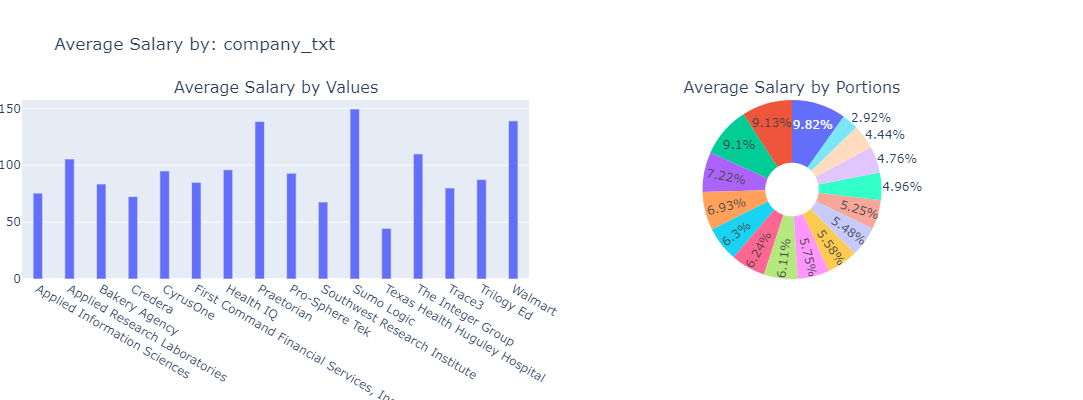

In [79]:
function2("company_txt", "Texas")

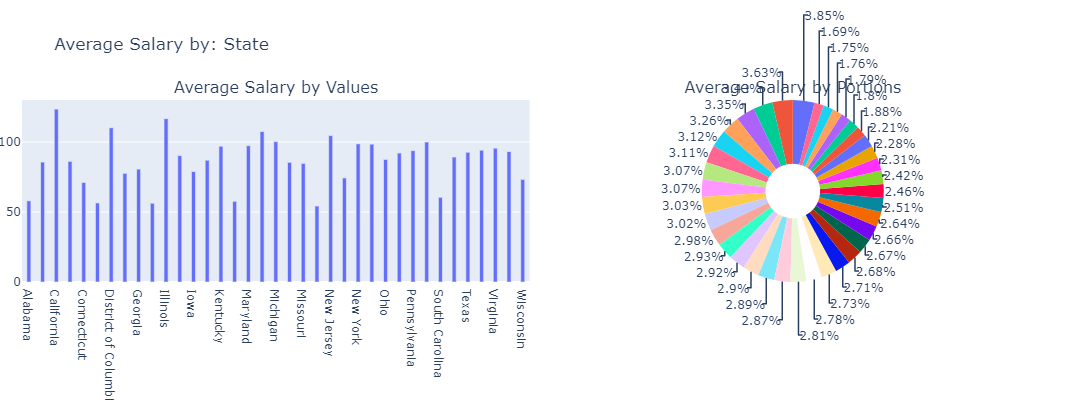

In [80]:
function2("State")

In [81]:
# Combine with IPywidgets
bState = widgets.Select(description="Select the State", 
                        options=["All"] + list(df_JC["State"]))
mapWidget = go.FigureWidget(figMap2)
box1 = widgets.VBox([mapWidget, bState])
display(box1)                                                    
                        

    'data': [{'customdata': array([[152]], dtype=int64),
              'geo': 'g…

In [86]:
# Show widgets 
def function3(option, state="All"):
    if "All".lower() in state.lower(): df_temp = df1
    else: df_temp = df1[df1["State"] == state]
    df_counts = df_temp.groupby(option)["Average Salary"].mean()
    fig = make_subplots(rows=1, cols=2, 
                        subplot_titles=("Average Salary by Values", "Average Salary by Portions"),
                        column_widths=[0.6, 0.5],
                        specs=[[{"type":"xy"}, {"type": "domain"}]])
    goBar = go.Bar(x=df_counts.index, y=df_counts.values, width=0.3, showlegend=False)
    goPie = go.Pie(labels=df_counts.index, values=df_counts.values, 
                   showlegend=False, hole=.3)
    fig.add_trace(goBar, row=1, col=1)
    fig.add_trace(goPie, row=1, col=2)
    fig.update_layout(width=600, height=400, margin={"r": 0, "t": 50, "l": 50, "b":0},
                      title=f"THE AVERAGE SALARY PLOT BY: {option}")
    return fig

fig1 = function3("Sector", "California")
fig2 = function3("Degree", "Massachusetts")
fig1W = go.FigureWidget(fig1)
fig2W = go.FigureWidget(fig2)
box2 = widgets.VBox([fig1W, fig2W])
display(box2)

    'data': [{'showlegend': False,
              'type': 'bar',
              'u…

In [87]:
# Making a dashboard
wOutput = widgets.Output(layout={'border': '0px solid white'})
labelLayout = {'border': '1px solid black', 'background': 'green', 
               'justify_content': 'center', 'display': 'flex'}
wLabel = widgets.Label(value="STATE: ALL", layout=labelLayout)

box2 = widgets.VBox([wLabel, wOutput])
box = widgets.HBox([box1, box2])
display(box)

def action():
    fig1 = function3("Sector")
    fig2 = function3("Degree")
    with wOutput:
        wOutput.clear_output()
        fig1.show()
        fig2.show()
action()

def action2(state):
    if state == "All":
        wLabel.value = "STATE: ALL"
    else:
        wLabel.value = "STATE: " + state
    fig1 = function3("Sector", state)
    fig2 = function3("job_title_sim", state)
    with wOutput:
        wOutput.clear_output()
        fig1.show()
        fig2.show()
a = widgets.interactive(action2, state=bState)

    'data': [{'customdata': array([[152]], dtype=int64),
        …